In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv('diabetes.csv')
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X_raw = data.drop("Outcome", axis=1)
y = data["Outcome"]

scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

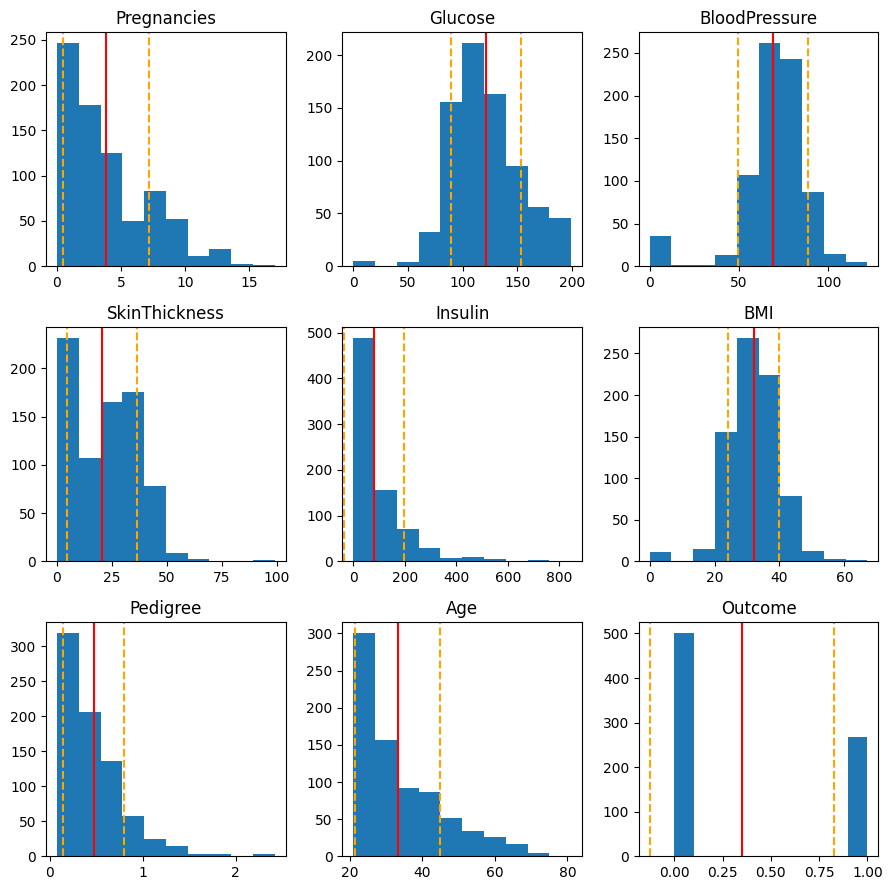

In [10]:
plt.figure(figsize=(9, 9))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    offset = data[column].std()
    mid = data[column].mean()
    plt.hist(data[column])
    plt.title(column)
    plt.axvline(mid, color='red')
    plt.axvline(mid - offset, color='orange', linestyle='--')
    plt.axvline(mid + offset, color='orange', linestyle='--')
plt.tight_layout()
plt.show()

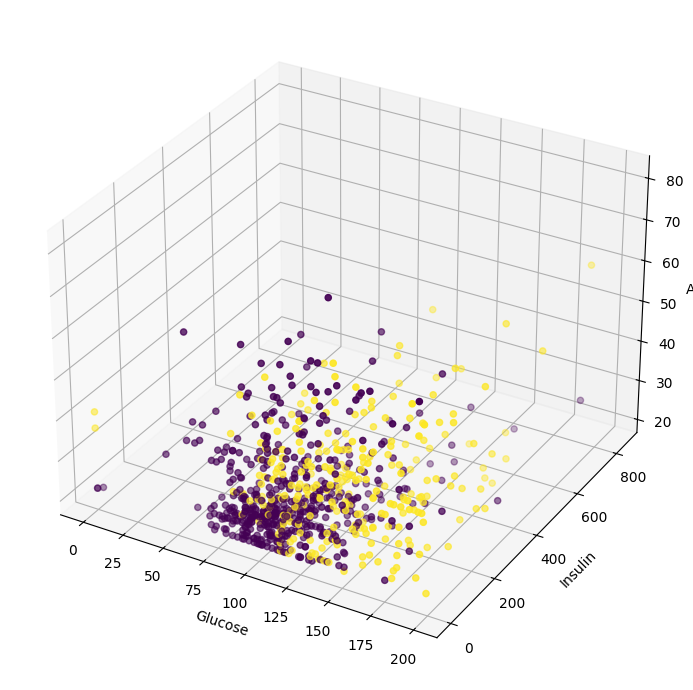

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    data["Glucose"],
    data["Insulin"],
    data["Age"],
    c=y,
)
ax.set_xlabel('Glucose')
ax.set_ylabel('Insulin')
ax.set_zlabel('Age')
plt.tight_layout()
plt.show()

In [54]:
class KNN:
    _y_train: np.ndarray
    _X_train: np.ndarray
    def __init__(self, n_neighbours = 3):   
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self._X_train = X_train
        self._y_train = y_train
    
    def _distance(self, x_test_i):
        return np.sqrt(np.sum((self._X_train - x_test_i) ** 2, axis=1))
    
    def _make_predict(self, x_test_i):
        distances = self._distance(x_test_i)
        k_nearest = distances.argsort()[:self.n_neighbours]
        targets = self._y_train[k_nearest]
        return np.bincount(targets).argmax()
    
    def predict(self, X_test):
        return np.array([self._make_predict(i) for i in X_test])
    
    def set_n_neighbours(self, n_neighbours):
        self.n_neighbours = n_neighbours
    


Модель 1. Используются случайные признаки

In [55]:
random_feature_indices = np.random.choice(X.shape[1], size=3, replace=False)
X_model1 = X[:, random_feature_indices]
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(X_model1, y.values, test_size=0.2, random_state=11)
knn_model1 = KNN(3)
knn_model1.fit(X_train_model1, y_train_model1)

In [57]:
for i in [3, 5, 7, 10]:
    knn_model1.set_n_neighbours(i)
    predicted_model1 = knn_model1.predict(X_test_model1)
    accuracy = np.flip(confusion_matrix(y_test_model1, predicted_model1))
    print(f"Модель 1, матрица ошибок при {i=} \n {accuracy}")
    print(f"Точность модели: {accuracy_score(y_test_model1, predicted_model1)}")

Модель 1, матрица ошибок при i=3 
 [[29 25]
 [18 82]]
Точность модели: 0.7207792207792207
Модель 1, матрица ошибок при i=5 
 [[30 24]
 [16 84]]
Точность модели: 0.7402597402597403
Модель 1, матрица ошибок при i=7 
 [[28 26]
 [15 85]]
Точность модели: 0.7337662337662337
Модель 1, матрица ошибок при i=10 
 [[22 32]
 [10 90]]
Точность модели: 0.7272727272727273


Как мы видим наибольшая точность при i=5

Модель 2. 
Используются признаки Pregnancies Glucose BMI

In [62]:
fixed_feature_indices = [0, 1, 5]
X_model2 = X[:, fixed_feature_indices]
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y.values, test_size=0.2, random_state=11)
knn_model2 = KNN(3)
knn_model2.fit(X_train_model2, y_train_model2)

In [63]:
for i in [3, 5, 7, 10]:
    knn_model2.set_n_neighbours(i)
    predicted_model2 = knn_model2.predict(X_test_model2)
    accuracy = np.flip(confusion_matrix(y_test_model2, predicted_model2))
    print(f"Модель 1, матрица ошибок при {i=} \n {accuracy}")
    print(f"Точность модели: {accuracy_score(y_test_model2, predicted_model2)}")

Модель 1, матрица ошибок при i=3 
 [[31 23]
 [12 88]]
Точность модели: 0.7727272727272727
Модель 1, матрица ошибок при i=5 
 [[30 24]
 [10 90]]
Точность модели: 0.7792207792207793
Модель 1, матрица ошибок при i=7 
 [[28 26]
 [14 86]]
Точность модели: 0.7402597402597403
Модель 1, матрица ошибок при i=10 
 [[26 28]
 [10 90]]
Точность модели: 0.7532467532467533


Эта модель показывает гораздо большую точность чем прошлая. Максимальная достигается при n=5